# Riemann Problem

In [1]:
!pip install kuibit

import matplotlib.pyplot as plt
import numpy as np
from kuibit.simdir import SimDir
from kuibit.grid_data import UniformGrid

## Exact Solution

In [2]:
#initial data from the Exact Riemann solver of https://www.brunogiacomazzo.org/?page_id=395
exact = np.loadtxt("Sod_exact.dat")

In [3]:
x_exact=exact[:,0]
rho_exact=exact[:,1]
press_exact=exact[:,2] #note: this is pgas+pmag
vx_exact=exact[:,3]
vy_exact=exact[:,4]
vz_exact=exact[:,5]
By_exact=exact[:,6]
Bz_exact=exact[:,7]

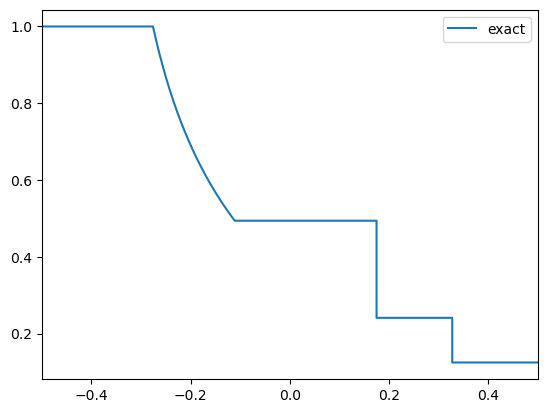

In [4]:
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()

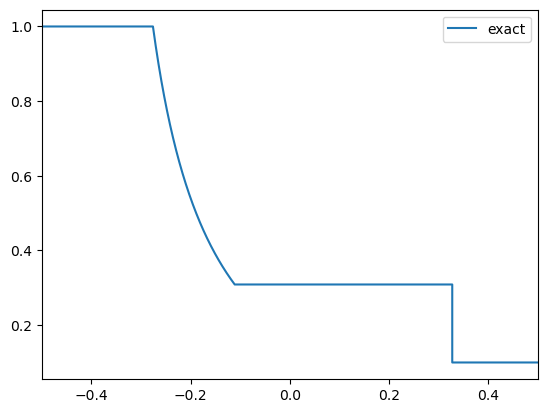

In [5]:
plt.plot(x_exact, press_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()

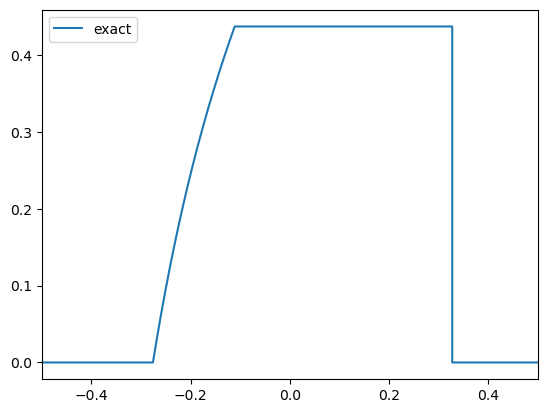

In [6]:
plt.plot(x_exact, vx_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()

## Read the Numerical Results

In [7]:
gf400= SimDir("/home/marti/simulations/Sod400def/").gf
gf200= SimDir("/home/marti/simulations/Sod200/").gf
gf2000= SimDir("/home/marti/simulations/Sod2000/").gf
gf40= SimDir("/home/marti/simulations/Sod40/").gf
print(gf400)


Available grid data of dimension 1D (x): 
['w_lorentz', 'rho', 'scon[1]', 'scon[2]', 'scon[0]', 'vel[1]', 'vel[0]', 'press', 'eps', 'vel[2]', 'dens', 'tau']


Available grid data of dimension 1D (y): 
['eps', 'vel[1]', 'scon[1]', 'tau', 'vel[0]', 'rho', 'dens', 'scon[2]', 'vel[2]', 'w_lorentz', 'scon[0]', 'press']


Available grid data of dimension 1D (z): 
['vel[1]', 'vel[0]', 'eps', 'vel[2]', 'scon[1]', 'scon[2]', 'w_lorentz', 'rho', 'dens', 'tau', 'press', 'scon[0]']


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
[]



In [8]:
vars1d400=gf400.x
vars1d200=gf200.x
vars1d2000=gf2000.x
vars1d40=gf40.x
print(vars1d400)


Available grid data of dimension 1D (x): 
['w_lorentz', 'rho', 'scon[1]', 'scon[2]', 'scon[0]', 'vel[1]', 'vel[0]', 'press', 'eps', 'vel[2]', 'dens', 'tau']



In [9]:
rho400=vars1d400.fields.rho
rho200=vars1d200.fields.rho
rho2000=vars1d2000.fields.rho
rho40=vars1d40.fields.rho

p400=vars1d400.fields.press
p200=vars1d200.fields.press
p2000=vars1d2000.fields.press
p40=vars1d40.fields.press

vx400=vars1d400.fields.vel[0]
vx200=vars1d200.fields.vel[0]
vx2000=vars1d2000.fields.vel[0]
vx40=vars1d40.fields.vel[0]

vy400=vars1d400.fields.vel[1]
vy200=vars1d200.fields.vel[1]
vy2000=vars1d2000.fields.vel[1]

## Kuibit Standard Methods for Plots

We create a uniform grid and plot the data on it. Kuibit indeed assumes that data were produced on a grid with several meshes (AMR). In our case the grid was already uniform, so later we will see an alternative way to plot the data without interpolating them on a new grid.

In [10]:
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45])

In [11]:
print(rho400.iterations)
print(rho200.iterations)
print(rho2000.iterations)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000]


In [12]:
rho_final400 = rho400.read_on_grid(200, small_grid)
rho_final200 = rho200.read_on_grid(100, small_grid)
rho_final2000 = rho2000.read_on_grid(1000, small_grid)
rho_final40 = rho40.read_on_grid(40, small_grid)

p_final400 = p400.read_on_grid(200, small_grid)
p_final200 = p200.read_on_grid(100, small_grid)
p_final2000 = p2000.read_on_grid(1000, small_grid)
p_final40 = p40.read_on_grid(40, small_grid)

vx_final400 = vx400.read_on_grid(200, small_grid)
vx_final200 = vx200.read_on_grid(100, small_grid)
vx_final2000 = vx2000.read_on_grid(1000, small_grid)
vx_final40 = vx40.read_on_grid(40, small_grid)

vy_final400 = vy400.read_on_grid(200, small_grid)
vy_final200 = vy200.read_on_grid(100, small_grid)
vy_final2000 = vy2000.read_on_grid(1000, small_grid)

In [13]:
print(*rho_final400.coordinates_meshgrid())

[-4.50000000e-01 -4.41000000e-01 -4.32000000e-01 -4.23000000e-01
 -4.14000000e-01 -4.05000000e-01 -3.96000000e-01 -3.87000000e-01
 -3.78000000e-01 -3.69000000e-01 -3.60000000e-01 -3.51000000e-01
 -3.42000000e-01 -3.33000000e-01 -3.24000000e-01 -3.15000000e-01
 -3.06000000e-01 -2.97000000e-01 -2.88000000e-01 -2.79000000e-01
 -2.70000000e-01 -2.61000000e-01 -2.52000000e-01 -2.43000000e-01
 -2.34000000e-01 -2.25000000e-01 -2.16000000e-01 -2.07000000e-01
 -1.98000000e-01 -1.89000000e-01 -1.80000000e-01 -1.71000000e-01
 -1.62000000e-01 -1.53000000e-01 -1.44000000e-01 -1.35000000e-01
 -1.26000000e-01 -1.17000000e-01 -1.08000000e-01 -9.90000000e-02
 -9.00000000e-02 -8.10000000e-02 -7.20000000e-02 -6.30000000e-02
 -5.40000000e-02 -4.50000000e-02 -3.60000000e-02 -2.70000000e-02
 -1.80000000e-02 -9.00000000e-03  5.55111512e-17  9.00000000e-03
  1.80000000e-02  2.70000000e-02  3.60000000e-02  4.50000000e-02
  5.40000000e-02  6.30000000e-02  7.20000000e-02  8.10000000e-02
  9.00000000e-02  9.90000

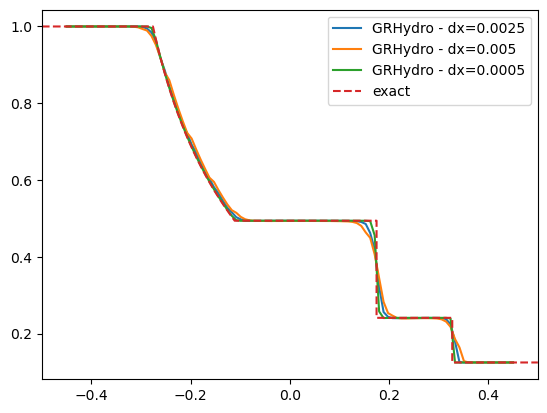

In [14]:
plt.plot(*rho_final400.coordinates_meshgrid(), rho_final400.data_xyz, label="GRHydro - dx=0.0025")
plt.plot(*rho_final200.coordinates_meshgrid(), rho_final200.data_xyz, label="GRHydro - dx=0.005")
plt.plot(*rho_final2000.coordinates_meshgrid(), rho_final2000.data_xyz, label="GRHydro - dx=0.0005")
plt.plot(x_exact, rho_exact, linestyle='--', label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.legend()
plt.show()

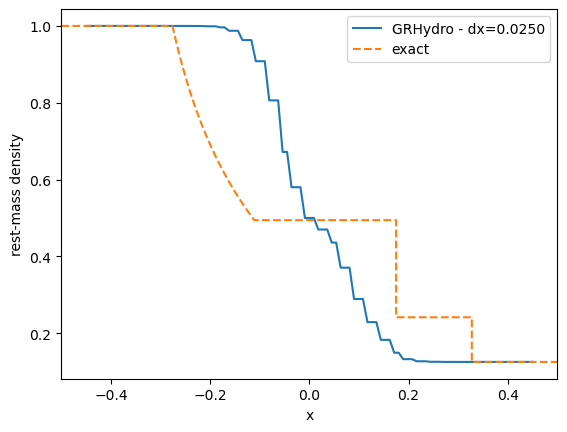

In [15]:
plt.plot(*rho_final40.coordinates_meshgrid(), rho_final40.data_xyz, label="GRHydro - dx=0.0250")
plt.plot(x_exact, rho_exact, linestyle='--', label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.xlabel("x")
plt.ylabel("rest-mass density")
plt.legend()
plt.show()

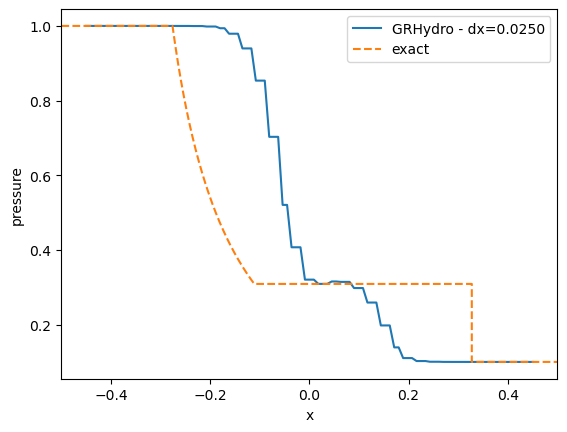

In [16]:
plt.plot(*p_final40.coordinates_meshgrid(), p_final40.data_xyz, label="GRHydro - dx=0.0250")
plt.plot(x_exact, press_exact, linestyle='--', label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.xlabel("x")
plt.ylabel("pressure")
plt.legend()
plt.show()

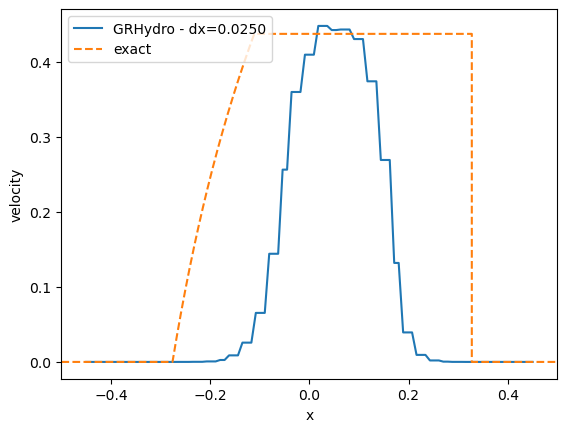

In [17]:
plt.plot(*vx_final40.coordinates_meshgrid(), vx_final40.data_xyz, label="GRHydro - dx=0.0250")
plt.plot(x_exact, vx_exact, linestyle='--', label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.xlabel("x")
plt.ylabel("velocity")
plt.legend(loc='upper left')
plt.show()

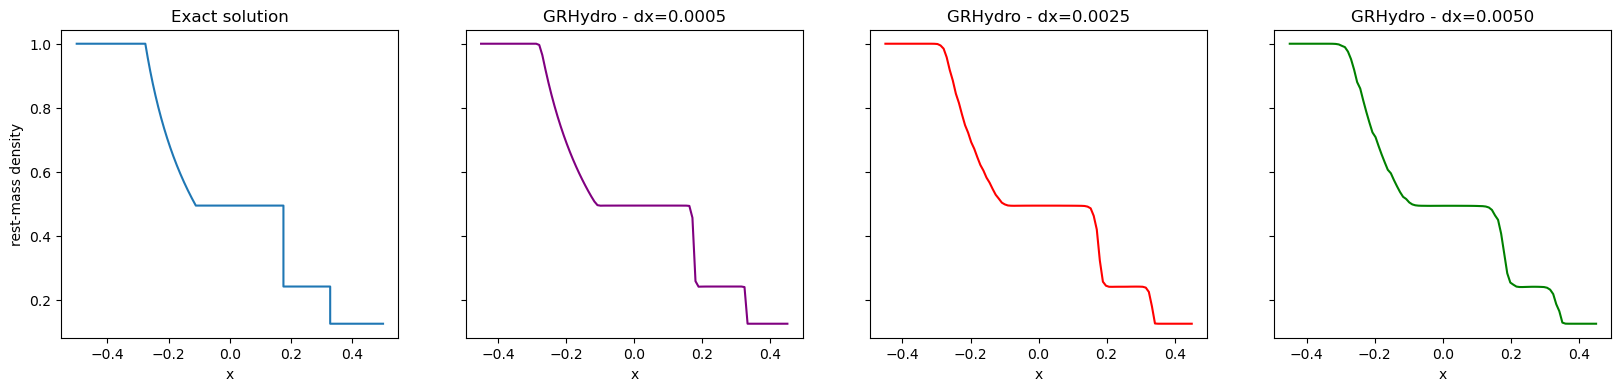

In [18]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4), sharey=True)
axs[0].plot(x_exact, rho_exact)
axs[0].set_title('Exact solution')
axs[0].set(xlabel="x", ylabel="rest-mass density")
axs[1].plot(*rho_final2000.coordinates_meshgrid(), rho_final2000.data_xyz, color='purple')
axs[1].set_title("GRHydro - dx=0.0005")
axs[1].set(xlabel="x")
axs[2].plot(*rho_final400.coordinates_meshgrid(), rho_final400.data_xyz, color='red')
axs[2].set_title("GRHydro - dx=0.0025")
axs[2].set(xlabel="x")
axs[3].plot(*rho_final200.coordinates_meshgrid(), rho_final200.data_xyz, color='green')
axs[3].set_title("GRHydro - dx=0.0050")
axs[3].set(xlabel="x")
plt.show()

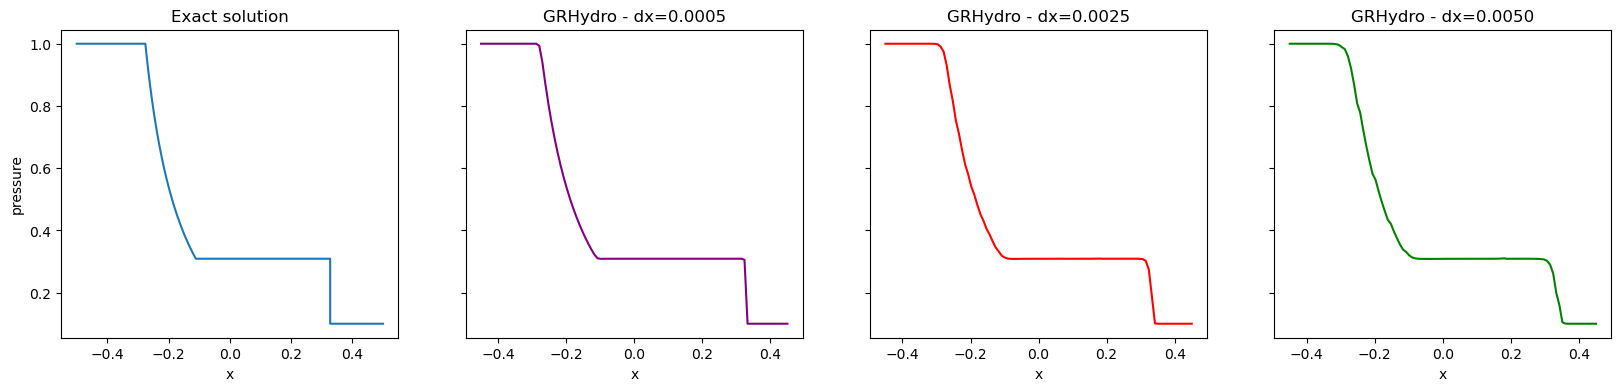

In [19]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4), sharey=True)
axs[0].plot(x_exact, press_exact)
axs[0].set_title('Exact solution')
axs[0].set(xlabel="x", ylabel="pressure")
axs[1].plot(*p_final2000.coordinates_meshgrid(), p_final2000.data_xyz, color='purple')
axs[1].set_title("GRHydro - dx=0.0005")
axs[1].set(xlabel="x")
axs[2].plot(*p_final400.coordinates_meshgrid(), p_final400.data_xyz, color='red')
axs[2].set_title("GRHydro - dx=0.0025")
axs[2].set(xlabel="x")
axs[3].plot(*p_final200.coordinates_meshgrid(), p_final200.data_xyz, color='green')
axs[3].set_title("GRHydro - dx=0.0050")
axs[3].set(xlabel="x")
plt.show()

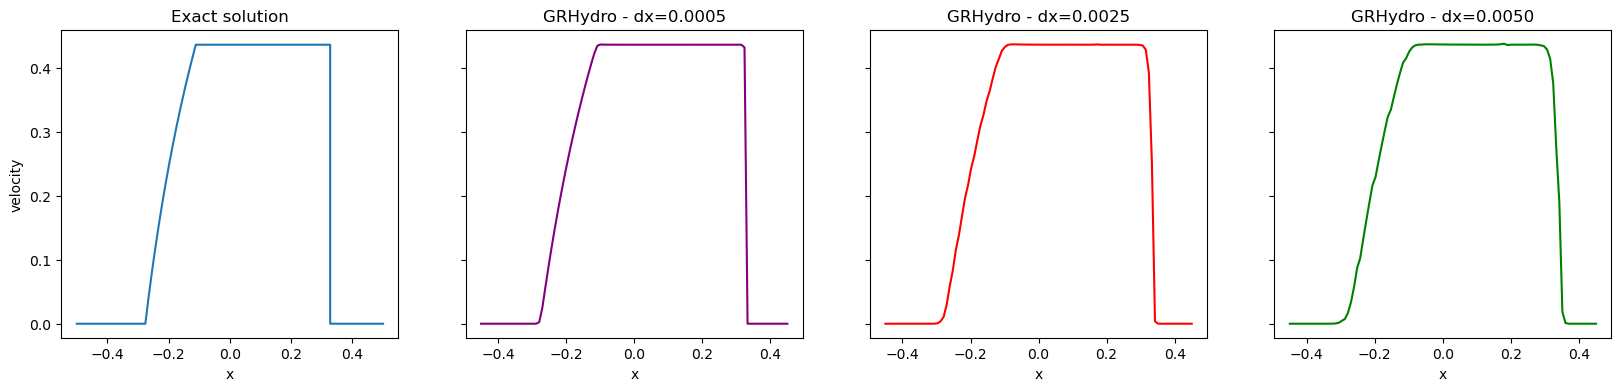

In [20]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4), sharey=True)
axs[0].plot(x_exact, vx_exact)
axs[0].set_title('Exact solution')
axs[0].set(xlabel="x", ylabel="velocity")
axs[1].plot(*vx_final2000.coordinates_meshgrid(), vx_final2000.data_xyz, color='purple')
axs[1].set_title("GRHydro - dx=0.0005")
axs[1].set(xlabel="x")
axs[2].plot(*vx_final400.coordinates_meshgrid(), vx_final400.data_xyz, color='red')
axs[2].set_title("GRHydro - dx=0.0025")
axs[2].set(xlabel="x")
axs[3].plot(*vx_final200.coordinates_meshgrid(), vx_final200.data_xyz, color='green')
axs[3].set_title("GRHydro - dx=0.0050")
axs[3].set(xlabel="x")
plt.show()

## Alternative Method
This method can only be used with simulations that used only one refinement level (i.e., a uniform grid) and using only 1 MPI process.

In [21]:
#[iterazione][refinement level][component number]
rho400[0][0][0].data

array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   ,

In [22]:
rho400[0][0][0].coordinates()[0].data

array([-0.4975, -0.495 , -0.4925, -0.49  , -0.4875, -0.485 , -0.4825,
       -0.48  , -0.4775, -0.475 , -0.4725, -0.47  , -0.4675, -0.465 ,
       -0.4625, -0.46  , -0.4575, -0.455 , -0.4525, -0.45  , -0.4475,
       -0.445 , -0.4425, -0.44  , -0.4375, -0.435 , -0.4325, -0.43  ,
       -0.4275, -0.425 , -0.4225, -0.42  , -0.4175, -0.415 , -0.4125,
       -0.41  , -0.4075, -0.405 , -0.4025, -0.4   , -0.3975, -0.395 ,
       -0.3925, -0.39  , -0.3875, -0.385 , -0.3825, -0.38  , -0.3775,
       -0.375 , -0.3725, -0.37  , -0.3675, -0.365 , -0.3625, -0.36  ,
       -0.3575, -0.355 , -0.3525, -0.35  , -0.3475, -0.345 , -0.3425,
       -0.34  , -0.3375, -0.335 , -0.3325, -0.33  , -0.3275, -0.325 ,
       -0.3225, -0.32  , -0.3175, -0.315 , -0.3125, -0.31  , -0.3075,
       -0.305 , -0.3025, -0.3   , -0.2975, -0.295 , -0.2925, -0.29  ,
       -0.2875, -0.285 , -0.2825, -0.28  , -0.2775, -0.275 , -0.2725,
       -0.27  , -0.2675, -0.265 , -0.2625, -0.26  , -0.2575, -0.255 ,
       -0.2525, -0.2

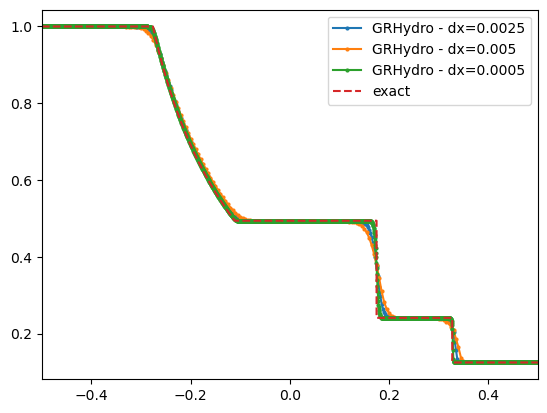

In [23]:
plt.plot(rho400[200][0][0].coordinates()[0].data,rho400[200][0][0].data, label="GRHydro - dx=0.0025", marker='o', markersize=2)
plt.plot(rho200[100][0][0].coordinates()[0].data,rho200[100][0][0].data, label="GRHydro - dx=0.005", marker='o', markersize=2)
plt.plot(rho2000[1000][0][0].coordinates()[0].data,rho2000[1000][0][0].data, label="GRHydro - dx=0.0005", marker='o', markersize=2)
plt.plot(x_exact, rho_exact, linestyle='--', label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()

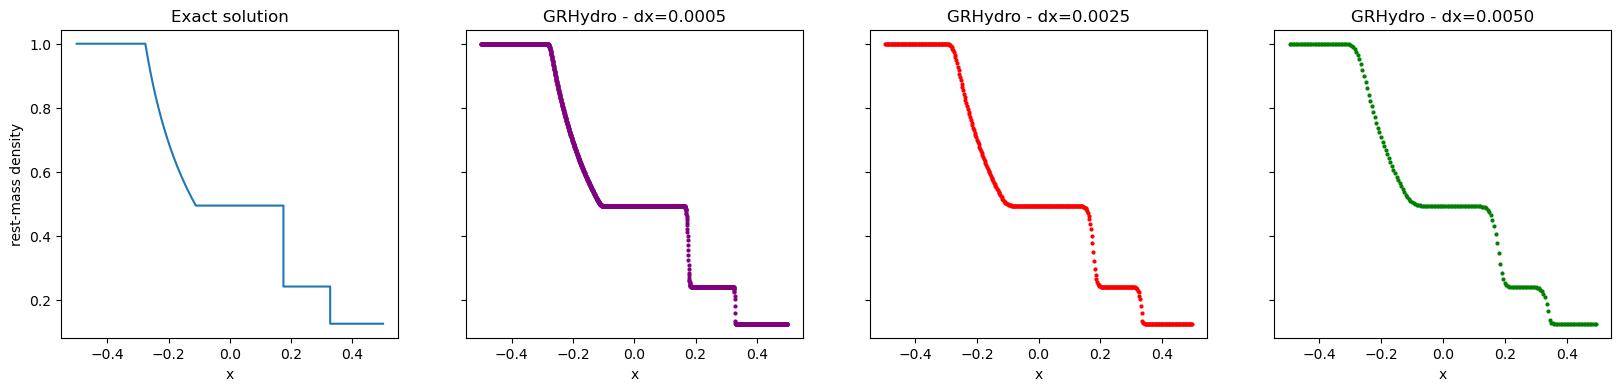

In [24]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4), sharey=True)
axs[0].plot(x_exact, rho_exact)
axs[0].set_title('Exact solution')
axs[0].set(xlabel="x", ylabel="rest-mass density")
axs[1].plot(rho2000[1000][0][0].coordinates()[0].data,rho2000[1000][0][0].data, color='purple', marker='o', markersize=2, linestyle='')
axs[1].set_title("GRHydro - dx=0.0005")
axs[1].set(xlabel="x")
axs[2].plot(rho400[200][0][0].coordinates()[0].data,rho400[200][0][0].data, color='red', marker='o', markersize=2, linestyle='')
axs[2].set_title("GRHydro - dx=0.0025")
axs[2].set(xlabel="x")
axs[3].plot(rho200[100][0][0].coordinates()[0].data,rho200[100][0][0].data, color='green', marker='o', markersize=2, linestyle='')
axs[3].set_title("GRHydro - dx=0.0050")
axs[3].set(xlabel="x")
plt.show()

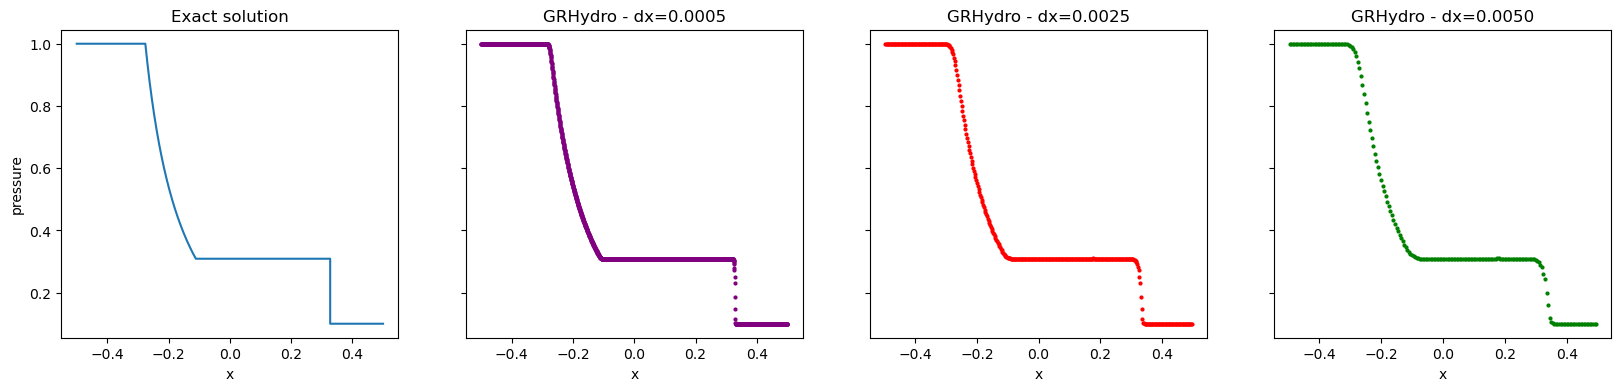

In [25]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4), sharey=True)
axs[0].plot(x_exact, press_exact)
axs[0].set_title('Exact solution')
axs[0].set(xlabel="x", ylabel="pressure")
axs[1].plot(p2000[1000][0][0].coordinates()[0].data,p2000[1000][0][0].data, color='purple', marker='o', markersize=2, linestyle='')
axs[1].set_title("GRHydro - dx=0.0005")
axs[1].set(xlabel="x")
axs[2].plot(p400[200][0][0].coordinates()[0].data,p400[200][0][0].data, color='red', marker='o', markersize=2, linestyle='')
axs[2].set_title("GRHydro - dx=0.0025")
axs[2].set(xlabel="x")
axs[3].plot(p200[100][0][0].coordinates()[0].data,p200[100][0][0].data, color='green', marker='o', markersize=2, linestyle='')
axs[3].set_title("GRHydro - dx=0.0050")
axs[3].set(xlabel="x")
plt.show()

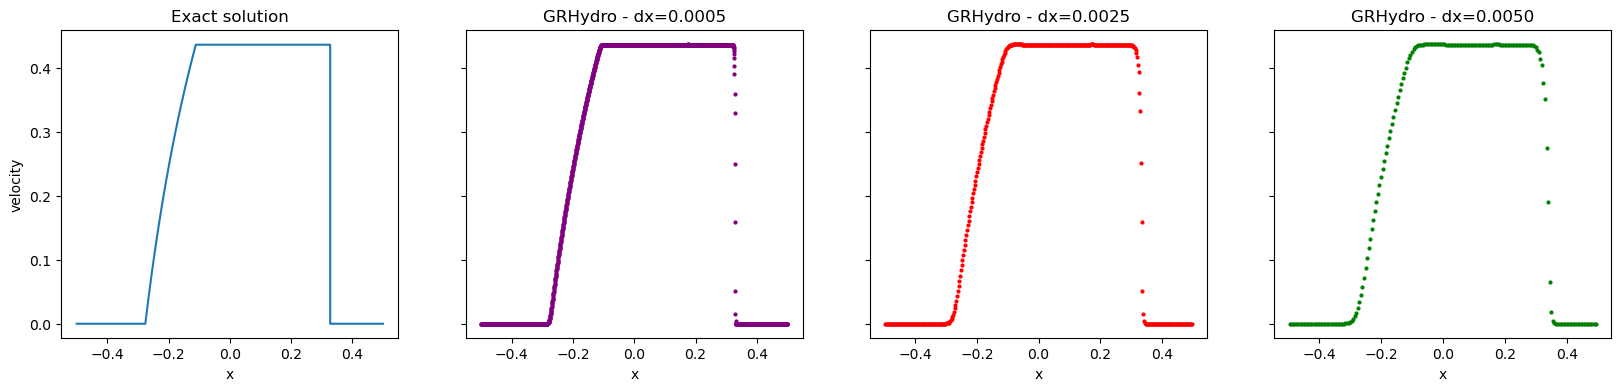

In [26]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4), sharey=True)
axs[0].plot(x_exact, vx_exact)
axs[0].set_title('Exact solution')
axs[0].set(xlabel="x", ylabel="velocity")
axs[1].plot(vx2000[1000][0][0].coordinates()[0].data,vx2000[1000][0][0].data, color='purple', marker='o', markersize=2, linestyle='')
axs[1].set_title("GRHydro - dx=0.0005")
axs[1].set(xlabel="x")
axs[2].plot(vx400[200][0][0].coordinates()[0].data,vx400[200][0][0].data, color='red', marker='o', markersize=2, linestyle='')
axs[2].set_title("GRHydro - dx=0.0025")
axs[2].set(xlabel="x")
axs[3].plot(vx200[100][0][0].coordinates()[0].data,vx200[100][0][0].data, color='green', marker='o', markersize=2, linestyle='')
axs[3].set_title("GRHydro - dx=0.0050")
axs[3].set(xlabel="x")
plt.show()